## One vs Rest Classifier

In [31]:
from sklearn import datasets
import warnings 
warnings.filterwarnings(action='ignore') 

In [2]:
digit_dataset=datasets.load_digits()

In [16]:
digit_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [17]:
print(digit_dataset['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [9]:
# 8x8 데이터를 flatten 시켜준 것 손글씨가 8*8로 이루어져있음
digit_dataset['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [10]:
digit_dataset['data'].shape

(1797, 64)

In [11]:
digit_dataset['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
digit_dataset['images'][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

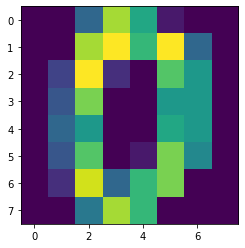

In [15]:
import matplotlib.pyplot as plt
plt.imshow(digit_dataset['images'][0])
plt.show()

In [18]:
X=digit_dataset['data']
Y=digit_dataset['target']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, Y)

In [26]:
# ovr : one vs rest / multinomial : softmax (nomalize)
from sklearn.linear_model import LogisticRegression

logreg_ovr=LogisticRegression(multi_class='ovr')
logreg_softmax=LogisticRegression(multi_class='multinomial')

In [32]:
logreg_ovr.fit(X_train, Y_train)
logreg_softmax.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred=logreg_ovr.predict(X_test)
y_true=Y_test

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)
# 대각선이 맞춘것 , 그 외가 틀린 것

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 33,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  3,  0],
       [ 0,  2,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 51,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 48,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  2, 38]], dtype=int64)

In [35]:
# 깔끔히 보여주는 것 
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.94      0.98      0.96        50
           2       0.97      0.94      0.96        35
           3       0.95      0.92      0.94        39
           4       0.98      0.96      0.97        56
           5       0.98      0.98      0.98        51
           6       1.00      0.96      0.98        53
           7       0.93      1.00      0.96        40
           8       0.87      0.96      0.91        50
           9       0.97      0.88      0.93        43

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.9577777777777777

In [38]:
y_pred=logreg_softmax.predict(X_test)
y_true=Y_test

accuracy_score(y_true, y_pred)

0.9711111111111111

In [40]:
from sklearn.model_selection import cross_val_score

cross_val_score(logreg_ovr, X, Y, scoring="accuracy", cv=20, n_jobs=8).mean()

0.9453995006242195

In [42]:
cross_val_score(logreg_softmax, X, Y, scoring="accuracy", cv=20, n_jobs=8).mean()

0.948202247191011

In [43]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average="macro")
# average의 default 값은 binary기에 설정해줘야함

0.9715079350267126

## One vs One Classifier
* 모든 Classifier가 투표에 다 참여해서 가장 높은 것을 찾음. 앙상블 기법이라 함

### OneVsRestClassifier

In [45]:
from sklearn.multiclass import OneVsRestClassifier
y_pred = OneVsRestClassifier(logreg_ovr).fit(X_train, Y_train).predict(X_test)
y_true = Y_test
accuracy_score(y_true, y_pred)

0.9577777777777777

In [49]:
# ovr은 class의 갯수만큼의 model을 설정해주는구나
OneVsRestClassifier(logreg_ovr).fit(X_train, Y_train).estimators_

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='ovr', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='ovr', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='ovr', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 Logist

### OneVsOneClassifier

In [51]:
from sklearn.multiclass import OneVsOneClassifier
y_pred = OneVsOneClassifier(logreg_ovr).fit(X_train, Y_train).predict(X_test)
y_true = Y_test
accuracy_score(y_true, y_pred)

0.9866666666666667

In [54]:
# nC2 만큼의 갯수가 나옴
len(OneVsOneClassifier(logreg_ovr).fit(X_train, Y_train).estimators_)

45

In [55]:
## http://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score

In [57]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [58]:
# Compute confusion matrix
class_names = digit_dataset["target_names"]
cnf_matrix = confusion_matrix(y_true, y_pred)
cnf_matrix

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 56,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 50,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 49,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 41]], dtype=int64)

Confusion matrix, without normalization
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  1  0]
 [ 0  0  0  0 56  0  0  0  0  0]
 [ 0  1  0  0  0 50  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  1  0  0  0  0  0 49  0]
 [ 0  0  0  0  0  1  0  0  1 41]]
Normalized confusion matrix
[[0.97 0.   0.   0.   0.03 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.97 0.   0.   0.   0.   0.03 0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.02 0.   0.   0.   0.98 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.02 0.   0.   0.   0.   0.   0.98 0.  ]
 [0.   0.   0.   0.   0.   0.02 0.   0.   0.02 0.95]]


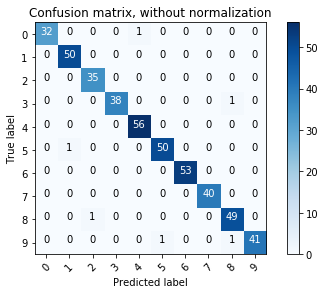

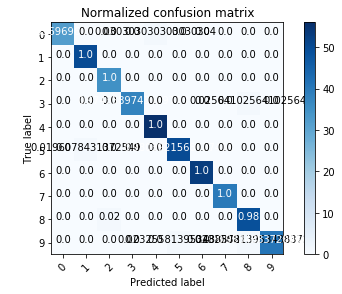

In [59]:
import numpy as np
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()